# Homework 9

## Derek Anderson, Justin Dygert, Cameron Miller

### Question 1

In this exercise I want you to do a quick EDA on the Lending club data set. The data is available on the GitHub repository for the course. All the variable names are self explanatory except the dti which stands for disposable debt to income ratio. Also note that loan_status=0 means default and 1 means good condition (no default).

Show me what you have learned from the previous EDAs you did in HW2, HW3 and, HW8. Try to come up with an interesting story (hypothesis) using this data set. Treat this exercise as a real world project. Many times the managers have no idea what they want from the data!! your job is to be as creative as possible and come up with informative charts and tables. 

Import the lendingclub.cvs as df. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  #if you want to use seaborn themes with matplotlib functions
import warnings
warnings.filterwarnings('ignore')
rand_state = 1000

In [3]:
df = pd.read_csv('lendingclub.csv')

df.head()

,home_ownership,income,dti,fico,loan_status
0,1,43.0,39.66,670,0
1,1,80.0,39.54,685,1
2,0,30.0,39.52,695,1
3,1,105.0,39.45,710,0
4,0,28.6,39.28,680,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   home_ownership  2270 non-null   int64  
 1   income          2270 non-null   float64
 2   dti             2270 non-null   float64
 3   fico            2270 non-null   int64  
 4   loan_status     2270 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 88.8 KB


The following is retyping the variables.

In [5]:
categorical = ['home_ownership', 'loan_status']

for col in categorical: 
    df[col] = df[col].astype("category")

numerics = ['income', 'dti', 'fico']

for col in numerics:
    df[col] = pd.to_numeric(df[col], errors = 'coerce')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2270 entries, 0 to 2269
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   home_ownership  2270 non-null   category
 1   income          2270 non-null   float64 
 2   dti             2270 non-null   float64 
 3   fico            2270 non-null   int64   
 4   loan_status     2270 non-null   category
dtypes: category(2), float64(2), int64(1)
memory usage: 58.0 KB


This is checking for NA's. As can be seen from the output, there are no NA's.

In [7]:
df.isnull().sum()/len(df)*100

home_ownership    0.0
income            0.0
dti               0.0
fico              0.0
loan_status       0.0
dtype: float64

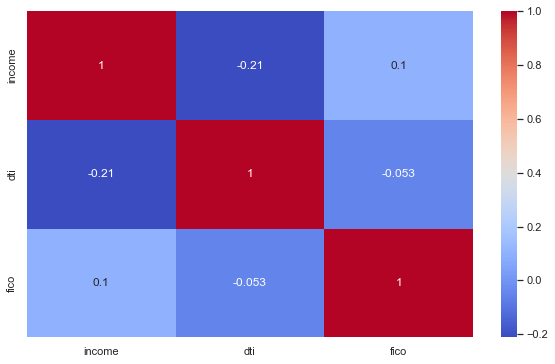

In [8]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm',annot=True)
plt.show()

It looks like amongst the numeric variables, there isnt very strong correlation between any of the variables.

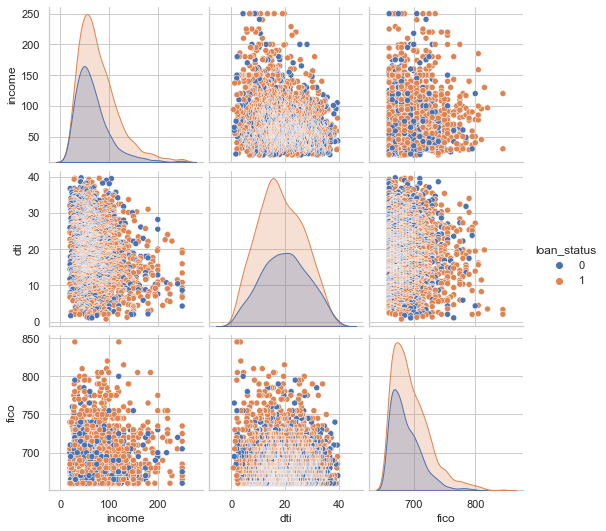

In [16]:
sns.set_style('whitegrid')
sns.pairplot(df, hue= 'loan_status')
plt.show()

The above plot shows scatter plots and distributions for the numeric variblaes with their loan status also plotted. It looks like in each plot its difficult to distinguish what observations are defaulted or not defaulted. We can also see that in the middle density plots more observations are in good standing than not.

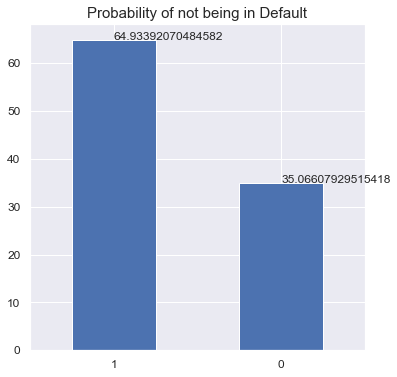

In [11]:
def_cnt = (df.loan_status.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability of not being in Default", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

The above plot shows what we suspected, the probability of being in good standing is about 65%, the probability of being in default is about 35%.

<Figure size 432x432 with 0 Axes>

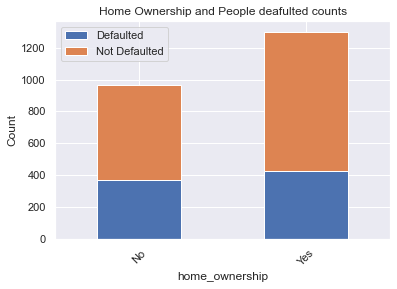

In [13]:
target_count = df.groupby(['home_ownership','loan_status']).home_ownership.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks([0,1], labels=["No", "Yes"], rotation=45)
plt.ylabel('Count')
plt.legend(['Defaulted', 'Not Defaulted'])
plt.title("Home Ownership and People deafulted counts")
plt.show()

The above plot shows a barplot for home ownership and the proportion of defaulted and non defaulted observtaions. As can be seen, there appears to be more observations of people who own homes. It looks like for both home owners and non home owners, the greater proportion of observations are in good standing.

### Question 2

1. What are the proportions of Good condition loans vs defaulted ones in the data set? Is the target variable (relatively) balanced or (relatively) imbalanced? 

In [15]:
pd.crosstab(df['loan_status'],df['loan_status'], normalize='all')*100

loan_status,0,1
loan_status,,
0,35.066079,0.000000
1,0.000000,64.933921


As we saw before, about 35% of the observations are in default and about 65% are in good standing. This is fairly balanced, it's not bad.

2. Along with the target variable, define your feature space (X) and split the data into test (20%) and train set (80%) 

In [17]:
y = df['loan_status']
X = df.drop('loan_status', axis=1) # becareful inplace= False

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rand_state)

3. From sklearn.svm import the relevant function for decision trees classification. Do the followings:

In [18]:
from sklearn.tree import DecisionTreeClassifier

3.1 Train the DT classification model using its default inputs.

In [19]:
Tree_classifier = DecisionTreeClassifier()
Tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

3.2 Make classifications on the test set and save them as y_hat 

In [20]:
y_hat = Tree_classifier.predict(X_test)

3.3 Use the built-in classification report function from sklearn. Report the Accuracy, precision, recall and f1 score along with the confusion matrix. Interpret all of these statistics. Do you trust the accuracy of the model? why? 

In [23]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

print(confusion_matrix(y_test, y_hat))
print(classification_report(y_test, y_hat))

[[ 62  98]
 [106 188]]
              precision    recall  f1-score   support

           0       0.37      0.39      0.38       160
           1       0.66      0.64      0.65       294

    accuracy                           0.55       454
   macro avg       0.51      0.51      0.51       454
weighted avg       0.56      0.55      0.55       454



The accuracy is .55. This reports overall how well the model is doing. This accuracy is not very good. Precision is the quality of positive predicitons in our model. Our model has a precision of .66, which means its quality is alright. Recall measures how well our model predicts positives that are actually positive. For our model we have a value of .63, which means its alright. F1 uses both recall and precision. Our f1 score is .65, which is pretty good. We dont trust the accuracy that much. The f1 score is not the best and there are a lot of false negatives in our model.

4. Pruning the tree: plot the accuracy_CV vs alphas from the cost complexity pruning path. Report the optimal value for alpha.

In [26]:
from sklearn.model_selection import cross_val_score
import sklearn.metrics

path = DecisionTreeClassifier().cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [27]:
accuracy_cv =[]
for alpha in ccp_alphas:
    accuracy = cross_val_score(estimator = DecisionTreeClassifier(ccp_alpha=alpha), X = X_train, y = y_train, cv = 5 , scoring="accuracy" )
    accuracy_cv.append(np.mean(accuracy))
    
output = pd.DataFrame(list(ccp_alphas), columns=['alpha'])
output['accuracy_CV']=accuracy_cv

output.head()

,alpha,accuracy_CV
0,0.000000,0.555062
1,0.000330,0.541303
2,0.000334,0.549012
3,0.000343,0.550115
4,0.000343,0.554515


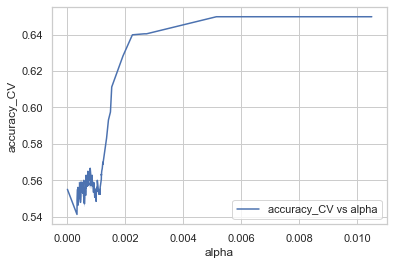

In [28]:
sns.lineplot(x='alpha', y='accuracy_CV', data=output , color='b', label="accuracy_CV vs alpha")
plt.show()

In [29]:
np.argmax(output['accuracy_CV'])

209

In [30]:
output.iloc[np.argmax(output['accuracy_CV']),]

alpha          0.005143
accuracy_CV    0.649781
Name: 209, dtype: float64

In [31]:
optimal_alpha = output.iloc[np.argmax(output['accuracy_CV']),0]
optimal_alpha

0.005142538659615947

As seen, our optimal alphs is about 0.00514

5. Re-estimate  (Re-fit) the DT classification model with the optimal alpha. Save the predictions as y_hat_optimized. 

In [32]:
optimal_DT = DecisionTreeClassifier(ccp_alpha=optimal_alpha)
optimal_DT.fit(X_train, y_train)
y_hat_opt = optimal_DT.predict(X_test)

6. Report the optimized classification metrics and compare them with the outputs from part 3.3 in Question2. Do you notice anything strange? what is going on here?

In [33]:
print(confusion_matrix(y_test, y_hat_opt))

print(classification_report(y_test, y_hat_opt))

[[  0 160]
 [  0 294]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       160
           1       0.65      1.00      0.79       294

    accuracy                           0.65       454
   macro avg       0.32      0.50      0.39       454
weighted avg       0.42      0.65      0.51       454



The model is only predicting positive outcomes. This is why our recall is 1, we have no false negatives so the recall is just true positive over true positive. Our accuracy has increase to .65. It looks like the terminal nodes of our trees do not have any nodes with a higher proportion of default observations. This kind of makes sense with how the proportion of the whole dataset was.

7. Estimate the optimized accuracy_test using 5 fold cross validation.

In [34]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = optimal_DT, X = X_train, y = y_train, cv = 5 , scoring="accuracy" )

round(accuracy.mean(),3)

0.65

8. Visualize a classification tree with the following hyper parameters: max_depth=4, min_samples_leaf=50.

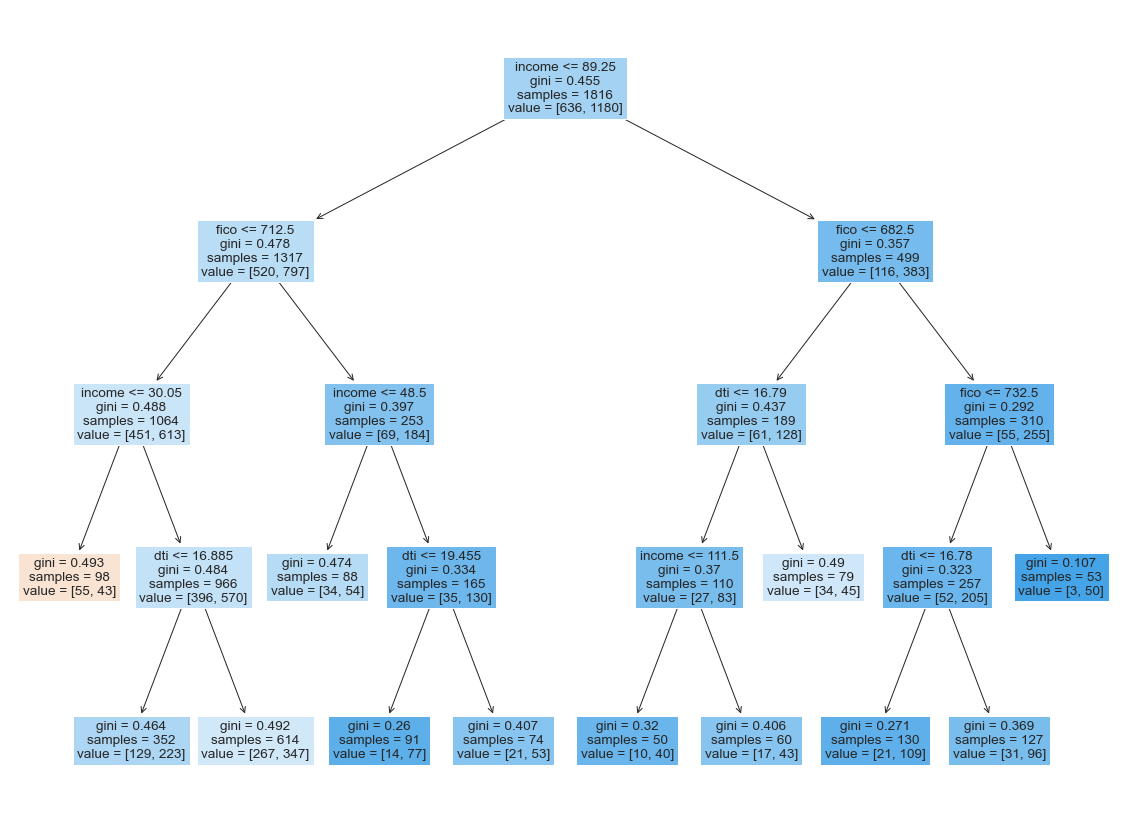

In [35]:
from sklearn.tree import plot_tree

dtree= DecisionTreeClassifier(max_depth=4, min_samples_leaf=50)
dtree.fit(X_train, y_train)
yhat = dtree.predict(X_test)

fig = plt.figure(figsize=(20,15))
DT_plot = plot_tree(dtree, feature_names=X_train.columns, filled=True)

8.1  In your decision tree, what is the best feature to start with and where does the algorithm put the cut off point?

The best feature to start with is income. This is the first variable split and it splits at 89.25.

8.2 Interpret what you see!  take one path for example and go down the tree. If income < ... and fico < .... and .... then default or good condition 

It looks like whatever path you go down, you end in a terminal node that predicts good standing. There is only one terminal node that predicts in default. We will follow the path to this node as our example. If income is less than 89.25 and fico is less than 712.5 and income is less than 30.05 then the model predicts default.

8.3  How many terminal nodes do you see? why the number of terminal nodes is less than 16 in this example?

We see 12 terminal nodes. We chose a max depth of 4 so the the mode terminal nodes we could have with 4 as our depth is 2^4 or 16. It's okay four out tree to have less than this and thats why we have 12. There were no more splits the tree needed to do once it got to 12 nodes.

8.4  Are you satisfied with the gini numbers at the terminal nodes in general? explain why?

We are not very satisfied with the gini numbers at the terminal nodes. Most of the terminal nodes have gini numbers close to .5, there are only a couple lower than .3. The nodes close to .5 are the highest impurtiy you can have in a node. We suspected something like this was going on and thats why our tree is only predicting positives.